<a href="https://colab.research.google.com/github/unaexoo/Study/blob/main/5_Hand_Crafting_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt


def plot_digits(df, labels, num_images=100):
    """
    DataFrame에서 손글씨 숫자 데이터 세트의 이미지를 그리드 형태로 시각화
    df: 이미지 데이터를 포함하는 DataFrame. 각 행이 하나의 이미지를 나타내고, 각 열이 픽셀 값을 나타냄
    labels: 각 이미지에 대한 레이블 데이터를 포함하는 Series 또는 리스트.
    num_images: 시각화할 이미지 수.
    """
    # 이미지의 크기를 계산합니다 (예: 8x8)
    example_width = int(np.round(np.sqrt(df.shape[1])))
    example_height = int(df.shape[1] / example_width)


    # 그리드의 크기를 계산합니다
    display_rows = int(np.floor(np.sqrt(num_images)))
    display_cols = int(np.ceil(num_images / display_rows))


    fig, axes = plt.subplots(display_rows, display_cols, figsize=(display_cols, display_rows),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))


    for i, ax in enumerate(axes.flat):
        if i < num_images:
            image_data = df.iloc[i].to_numpy().reshape(example_height, example_width).T
            ax.imshow(image_data, cmap='binary', interpolation='nearest')
            ax.text(0.05, 0.05, str(labels[i] % 10), transform=ax.transAxes, color='green')


            # 연한 격자 표시 설정
            ax.set_xticks(np.arange(-.5, example_width, 1), minor=True)
            ax.set_yticks(np.arange(-.5, example_height, 1), minor=True)
            ax.grid(which="minor", color="gray", linestyle='-', linewidth=0.5)
            ax.tick_params(which="minor", size=0)
            ax.axis('on')


            # 주 그리드와 눈금 레이블을 제거하여 이미지에 집중할 수 있도록 함
            ax.grid(which="major", visible=False)
            ax.tick_params(which="major", size=0)
            ax.set_xticklabels([])
            ax.set_yticklabels([])


    plt.show()


(5000, 400)
(5000,)


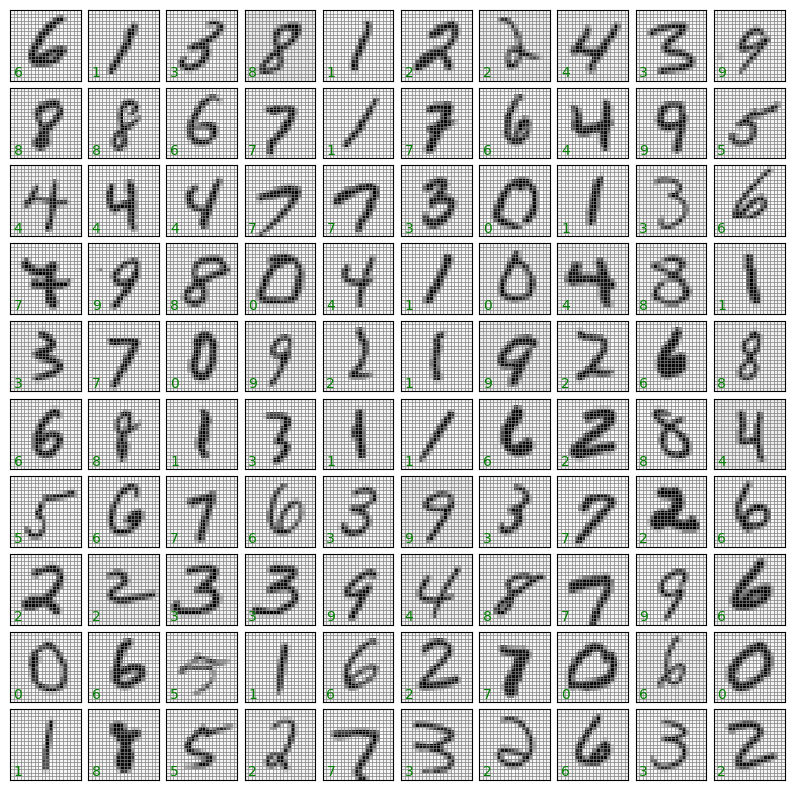

In [56]:
import pandas as pd

path = '/content/'
data = pd.read_csv(path +"D2-Hand-Writings.csv", header=0)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(X.shape)
print(y.shape)

sample_X = X.sample(100)
sample_y = y.iloc[sample_X.index]

plot_digits(sample_X,sample_y.values, num_images=100)

틀 잡기

In [57]:
num_labels = 10
input_layer_size = X.shape[1] # 20*20
hidden_layer_size = [25]
output_layer_size = num_labels

print(input_layer_size)
print(hidden_layer_size)
print(output_layer_size)

400
[25]
10


In [58]:
# parameter 크기 설정
w01_size = (input_layer_size +1, hidden_layer_size[0])
w12_size = (hidden_layer_size[0], output_layer_size)

print("w01_size : ", w01_size)
print("w12_size : ", w12_size)

w01_size :  (401, 25)
w12_size :  (25, 10)


In [59]:
# 가중치 행렬 설정
# 0 행렬
w01 = np.zeros(w01_size)
w12 = np.zeros(w12_size)

print("w01 : \n", w01)
print("w12 : \n", w12)

# random 실수 초기화
w01 = np.random.rand(w01_size[0], w01_size[1])
w12 = np.random.rand(w12_size[0], w12_size[1])

print("w01 : \n", w01)
print("w12 : \n", w12)

w01 : 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
w12 : 
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
w0

In [60]:
# 전체 행렬 크기 순서대로 확인하기
print("input_layer: ", input_layer_size)
print("w01 (", w01_size, ")")
print("hidden_layer: ", hidden_layer_size[0])
print("w12 (", w12_size, ")")
print("output_layer: ", output_layer_size)

input_layer:  400
w01 ( (401, 25) )
hidden_layer:  25
w12 ( (25, 10) )
output_layer:  10


In [61]:
# activation function

def logi_func(x):
  x_clipped = np.clip(x, -709, 709)
  return 1 / (1 + np.exp(-x_clipped))

def tanh_func(x):
  return np.tanh(x)

def relu_func(x) :
  return np.maximum(0, x)

# activation fucntion callback
cur_activ_func = logi_func

# 활성화 함수 설정
def set_active_func(func) :
  global cur_activ_func
  cur_activ_func = func

# 설정된 활성화 함수 호출 함수
def call_activ_func(x) :
  return cur_activ_func(x)

In [62]:
# cost function

def one_hot_encode(y_true, n_label = None) :
  if n_label is None :
    n_label = np.max(y_true)
  return np.eye(n_label)[y_true -1]

def sse_cost(y_true, y_pred) :
  return np.sum((y_true - y_pred)**2)/2

def cateforical_cross_entropy_cost(y_true, y_pred) :
  epsilon = 1e-12
  y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
  return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

# 현재 설정된 cost 함수를 저장할 전역 번수
cur_cost_func = sse_cost

def set_cost_func(func) :
  global cur_cost_func
  cur_cost_func = func

def call_cost_func(y_true, y_pred) :
  return cur_cost_func(y_true, y_pred)

In [63]:
# y레이블을 one-hot 코드 형식으로 변환
y_onehot = one_hot_encode(y)
# y_onehot = to_categorical(y%10)
print(y)
print(y_onehot)

0       10
1       10
2       10
3       10
4       10
        ..
4995     9
4996     9
4997     9
4998     9
4999     9
Name: Number, Length: 5000, dtype: int64
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


계산

In [64]:
# 입력 X에 편향에 대한 상수 추가
Xb = np.hstack([np.ones((X.shape[0], 1)), X])

# 은닉층 출력 계산
a0 = Xb
# 은닉층의 입력 in1 계산
in1 = a0 @ w01
# 은닉층의 출력 a1 계산
a1 = call_activ_func(in1)
print("a1 = ",a1)

in2 = a1 @ w12
a2 = call_activ_func(in2)
print("a2 = ",a2)

J = cur_cost_func(y_onehot, a2)
print("Calculated Cost ",J)

a1 =  [[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.99999998 0.99999996 0.9999999  ... 0.99999996 0.99999992 0.99999998]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
a2 =  [[0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]
 [0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]
 [0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]
 ...
 [0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]
 [0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]
 [0.9999776  0.99999731 0.99999946 ... 0.99999829 0.99997641 0.99996161]]
Calculated Cost  22498.605699476157


In [65]:
def front_propag(w01, w12,X,y) :
  Xb = np.hstack([np.ones((X.shape[0], 1)), X])
  a0 = Xb

  in1 = a0 @ w01
  a1 = call_activ_func(in1)

  in2 = a1 @ w12
  a2 = call_activ_func(in2)

  return a2, a1, a0, in2, in1

def total_cost_func(w01,w12, X, y) :
  a2, _, _, _, _ = front_propag(w01,w12,X,y)
  return cur_cost_func(one_hot_encode(y), a2)

J = total_cost_func(w01,w12,X,y)
print("f_Cost_test =",J)

f_Cost_test = 22498.605699476157


In [66]:
# 각 비용함수의 도함수 정의
def logi_func_deriv(x) :
  sigmoid = logi_func(x)
  return sigmoid * (1 - sigmoid)

def tanh_fun_deriv(x) :
  return 1 - tanh_func(x)**2

def relu_func_deriv(x) :
  return np.where(x > 0,1,0)

# 현재 설정된 Gradient 함수를 저장할 전역 변수
cur_grad_func =logi_func_deriv

def set_grad_func(func) :
  global cur_grad_func
  cur_grad_func = func

def call_grad_func(x) :
  return cur_grad_func(x)

In [67]:
def back_propag(a2, a1, a0, in2, in1, X, y_onehot):
  delta2 = (y_onehot - a2) * call_grad_func(in2)
  grad12 = -a1.T @ delta2 / X.shape[0] # 평균 그레디언트

  delta1 = delta2 @ w12.T * call_grad_func(in1)
  grad01 = -a0.T @ delta1 / X.shape[0] # 평균 그레디언트

  return grad12, grad01

In [68]:
X_arr = X.to_numpy()
y_arr = y.to_numpy()

set_active_func(logi_func)
set_grad_func(logi_func_deriv)
set_cost_func(sse_cost)

w01 = np.random.rand(w01_size[0], w01_size[1])
w12 = np.random.rand(w12_size[0], w12_size[1])

J = total_cost_func(w01, w12, X_arr, y_arr)
print("Initial Cost: ", J)

a2, a1, a0, in2, in1 = front_propag(w01, w12, X, y)

delta2 = (y_onehot - a2) * call_grad_func(in2)
grad12 = -a1.T @ delta2 / X.shape[0] # 평균 그레디언트

print("delta2",  delta2)
print("grad12", grad12)

delta1 = delta2 @ w12.T * call_grad_func(in1)
grad01 = -a0.T @ delta1 / X.shape[0] # 평균 그레디언트

print("delta1", delta1)
print("grad01", grad01)

Initial Cost:  22499.325771973225
delta2 [[-2.25992954e-07 -2.39103500e-05 -4.09425082e-06 ... -1.04731426e-06
  -1.98984232e-06  1.65461161e-11]
 [-2.25992954e-07 -2.39103500e-05 -4.09425082e-06 ... -1.04731426e-06
  -1.98984232e-06  1.65461161e-11]
 [-2.25992954e-07 -2.39103500e-05 -4.09425082e-06 ... -1.04731426e-06
  -1.98984232e-06  1.65461161e-11]
 ...
 [-2.25993182e-07 -2.39103664e-05 -4.09425669e-06 ... -1.04731559e-06
   3.95950679e-12 -4.06767148e-06]
 [-2.25992954e-07 -2.39103500e-05 -4.09425082e-06 ... -1.04731426e-06
   3.95949610e-12 -4.06766692e-06]
 [-2.25992954e-07 -2.39103500e-05 -4.09425082e-06 ... -1.04731426e-06
   3.95949610e-12 -4.06766692e-06]]
grad12 [[2.03394047e-07 2.15196968e-05 3.68491042e-06 1.43582343e-06
  1.88447369e-06 9.68967982e-05 2.80865995e-06 9.42604193e-07
  1.79090454e-06 3.66097207e-06]
 [2.03394002e-07 2.15196722e-05 3.68490622e-06 1.43582183e-06
  1.88447158e-06 9.68966877e-05 2.80865700e-06 9.42603115e-07
  1.79090257e-06 3.66096788e-06]
 [

In [71]:
alpha = 4e-3
momentum = 0.9
v_w01 = np.zeros_like(w01)
v_w12 = np.zeros_like(w12)

batch_size = 32
num_batches = int(np.ceil(X.shape[0] / batch_size))

n_epochs = 1000
gradient_threshold = 1e-6

for epoch in range(n_epochs) :
  indices = np.arange(X.shape[0])
  np.random.shuffle(indices)
  X_shuffled = X_arr[indices]
  y_shuffled = y_arr[indices]

  for batch in range(num_batches) :
    start = batch * batch_size
    end = min(start + batch_size, X_arr.shape[0])
    X_batch = X_shuffled[start:end]
    y_batch = y_shuffled[start:end]

    #onehot 코드로 변환
    y_onehot_batch = one_hot_encode(y_batch,10)

    # 출력 계산 : 순전판
    a2, a1, a0, in2, in1 = front_propag(w01, w12, X_batch, y_onehot_batch)

    # 경사도 계산 : 역전파
    grad12,grad01 = back_propag(a2, a1, a0, in2, in1, X_batch, y_onehot_batch)

    # 모멘텀 업데이트
    v_w01 = momentum * v_w01 + alpha * grad01
    v_w12 = momentum * v_w12 + alpha * grad12

    #가중치 업데이트
    w12 -= v_w12
    w01 -= v_w01

  if epoch % 100 == 0:
    J = total_cost_func(w01, w12, X, y)
    abs_grad01 = np.linalg.norm(grad01)
    abs_grad12 = np.linalg.norm(grad12)

    print(f"Epoch{epoch} : Cost = {J}. |Grad| = {abs_grad01 + abs_grad12}")

    if abs_grad01 + abs_grad12 < gradient_threshold:
      print(f"Stopped at epoch {epoch} : Gradient norm below threshold.")
      break

    if J< 650 :
      print(f"Stopped at epoch {epoch} : Cost below 650.")
      break


print(f"epoch {epoch +1} : Cost = {J}")

Epoch0 : Cost = 20474.57522074784. |Grad| = 0.011309618357627052
Epoch100 : Cost = 18449.906078402688. |Grad| = 0.08102536494626401
Epoch200 : Cost = 18449.905529237938. |Grad| = 0.08134643689070781
Epoch300 : Cost = 18449.89542838519. |Grad| = 0.06363016365316541
Epoch400 : Cost = 18449.888952191934. |Grad| = 0.04600222554077905
Epoch500 : Cost = 18449.880424860956. |Grad| = 0.08098943966909404
Epoch600 : Cost = 18449.874969511966. |Grad| = 0.08068187259270991
Epoch700 : Cost = 18449.873708721312. |Grad| = 0.046784587331277494
Epoch800 : Cost = 18449.859542465114. |Grad| = 0.04581810990334914
Epoch900 : Cost = 18449.846898627125. |Grad| = 0.016070159630112078
epoch 1000 : Cost = 18449.846898627125


In [70]:
def predict(w01, w12, X) :
  a2, _, _, _, _ = front_propag(w01, w12, X, y_onehot)
  y_pred = np.argmax(a2,axis = 1) +1
  return y_pred

y_pred = predict(w01, w12, X)
acc = np.mean(y_pred == y)
print("Accuracy: ", acc)

Accuracy:  0.1
